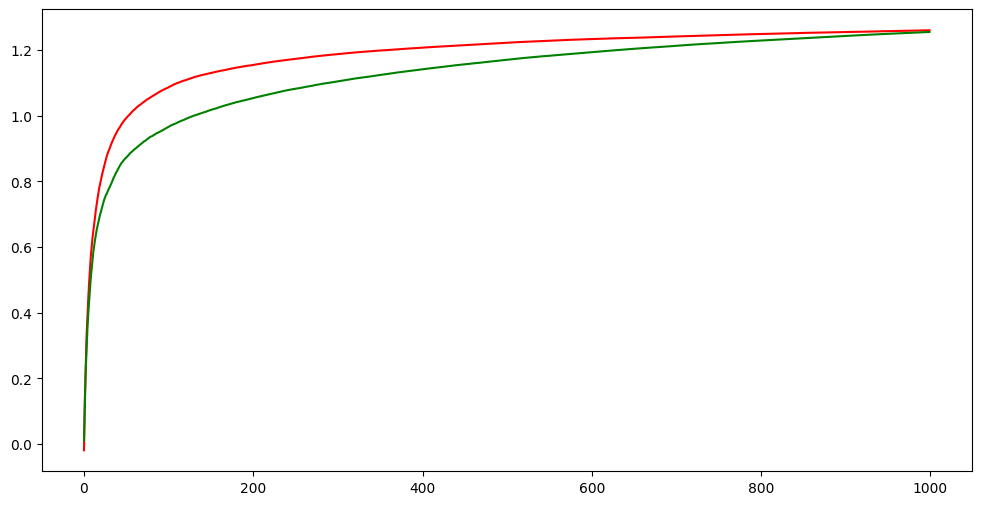

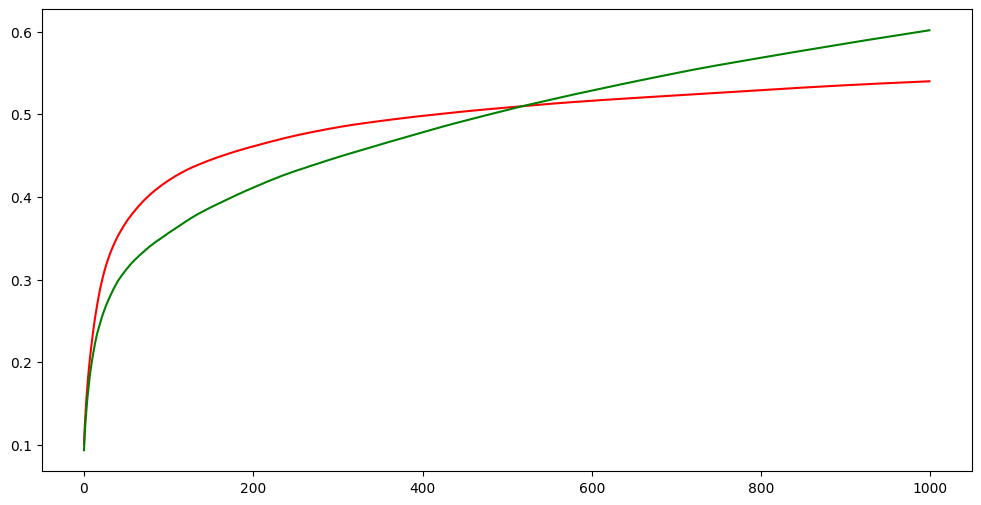

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
import profile

def greedy(qs):
    #ismaxs = qs.max() == qs
    #indices = [i for i in range(len(qs)) if ismaxs[i]]
    #return random.choice(indices)#slow
    return qs.argmax()

def epsilon_greedy(qs, epsilon):
    if random.random() < epsilon:
        return random.randint(0,len(qs)-1)
    else:
        return greedy(qs)

def run(num_arms, num_steps, num_tasks, epsilon, init_q):
    avg_optimal_actions = np.zeros(num_steps)
    avg_avg_rewards = np.zeros(num_steps)
    for t in range(num_tasks):
        means = np.random.randn(num_arms)
        qs = np.full(num_arms, init_q, dtype=np.float32)
        avg_rewards = np.zeros(num_steps)
        optimal_actions = np.zeros(num_steps)
        cum_reward = 0.0
        cum_optimal_action = 0
        optimal_action_index = means.argmax()
        offsets = np.random.randn(num_steps)
        for s in range(num_steps):
            idx = epsilon_greedy(qs, epsilon)
            #reward = np.random.normal(means[idx])
            #reward = random.gauss(means[idx],1)
            reward = means[idx] + offsets[s]
            qs[idx] += (reward - qs[idx]) * 0.1
            cum_reward += reward
            avg_rewards[s] = cum_reward/(s+1)
            if idx == optimal_action_index:
                cum_optimal_action += 1 
            optimal_actions[s] = float(cum_optimal_action)/float(s+1)
        avg_avg_rewards += (avg_rewards - avg_avg_rewards)/(t+1)
        avg_optimal_actions += (optimal_actions  - avg_optimal_actions)/(t+1)
    return avg_avg_rewards, avg_optimal_actions


def test():
    num_arms = 10
    num_steps = 1000
    num_tasks = 2000
    rewards0, actions0 = run(num_arms,num_steps,num_tasks,0.0, 0.1)
    rewards1, actions1 = run(num_arms,num_steps,num_tasks,0.1, 0)
#'''
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_steps), rewards0,"r")
    plt.plot(range(num_steps), rewards1,"g")
    plt.show()
    plt.figure(figsize=(12, 6))
    plt.plot(range(num_steps), actions0,"r")
    plt.plot(range(num_steps), actions1,"g")
    plt.show()
#'''

test()
#profile.run("test()",sort=1)



In [9]:
np.full(10, 0.0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])